In [3]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('ggplot')
sns.set()

# Step 2: Load Dataset
df = pd.read_csv('MiniProjectDataset.csv')
df.head()

,DATE,country,NEW Cases,NEW_DEATHS,vaccinated
0,2024-11-01,Argentina,NaN,NaN,unknown
1,2024-11-01,Australia,0.0,0.0,327
2,2024-11-01,Australia,0.0,0.0,327
3,2024-11-01,Brazil,971.0,48.0,430
4,2024-11-01,Canada,176.0,8.0,unknown


In [6]:
# Step 3: Clean Data
df.columns = df.columns.str.strip()

# Convert DATE to datetime with auto-detection (day first)
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True, errors='coerce')

# Replace 'unknown' with NaN and convert to numeric
df['vaccinated'] = pd.to_numeric(df['vaccinated'].replace('unknown', pd.NA), errors='coerce')

# Remove duplicates
df = df.drop_duplicates()

# Fill missing values in NEW Cases and NEW_DEATHS with 0
df['NEW Cases'] = df['NEW Cases'].fillna(0)
df['NEW_DEATHS'] = df['NEW_DEATHS'].fillna(0)
df

,DATE,country,NEW Cases,NEW_DEATHS,vaccinated
0,2024-01-11,Argentina,0.0,0.0,NaN
1,2024-01-11,Australia,0.0,0.0,327.0
3,2024-01-11,Brazil,971.0,48.0,430.0
4,2024-01-11,Canada,176.0,8.0,NaN
5,2024-01-11,China,1034.0,51.0,462.0
...,...,...,...,...,...
158,NaT,Argentina,1619.0,80.0,NaN
159,NaT,Australia,1473.0,73.0,428.0
160,NaT,Brazil,514.0,25.0,NaN
161,NaT,Canada,1133.0,56.0,438.0


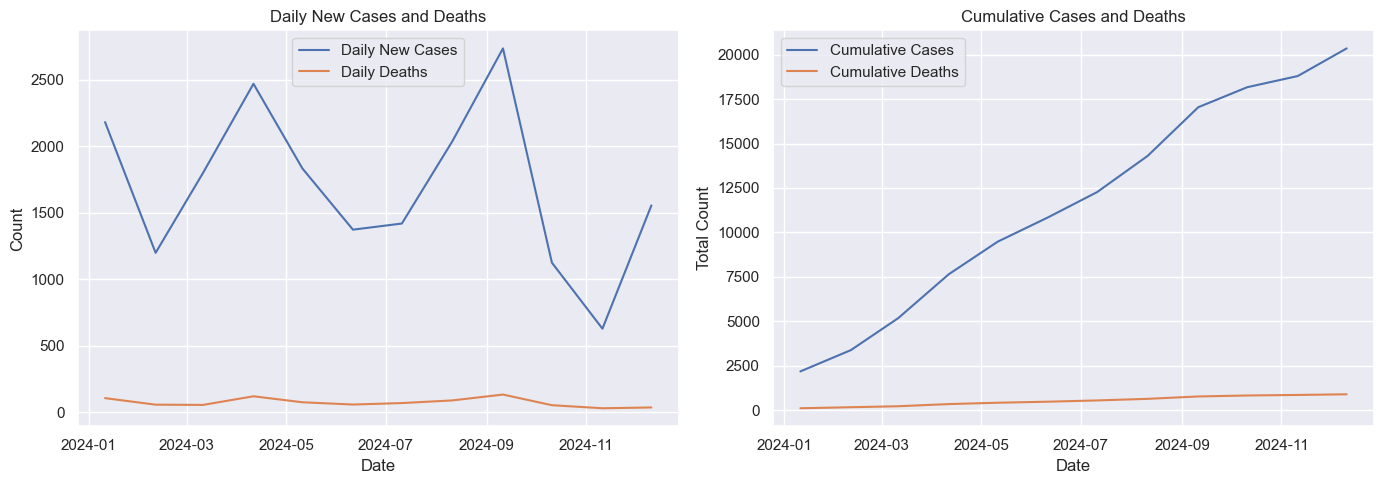

In [7]:
# Step 4: Global Daily and Cumulative Trend
daily_trend = df.groupby('DATE')[['NEW Cases', 'NEW_DEATHS']].sum().reset_index()
daily_trend['Cumulative Cases'] = daily_trend['NEW Cases'].cumsum()
daily_trend['Cumulative Deaths'] = daily_trend['NEW_DEATHS'].cumsum()

# Step 5: Plot Daily & Cumulative Trends
plt.figure(figsize=(14, 5))

# Daily Plot
plt.subplot(1, 2, 1)
plt.plot(daily_trend['DATE'], daily_trend['NEW Cases'], label='Daily New Cases')
plt.plot(daily_trend['DATE'], daily_trend['NEW_DEATHS'], label='Daily Deaths')
plt.title('Daily New Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

# Cumulative Plot
plt.subplot(1, 2, 2)
plt.plot(daily_trend['DATE'], daily_trend['Cumulative Cases'], label='Cumulative Cases')
plt.plot(daily_trend['DATE'], daily_trend['Cumulative Deaths'], label='Cumulative Deaths')
plt.title('Cumulative Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.legend()

plt.tight_layout()
plt.show()


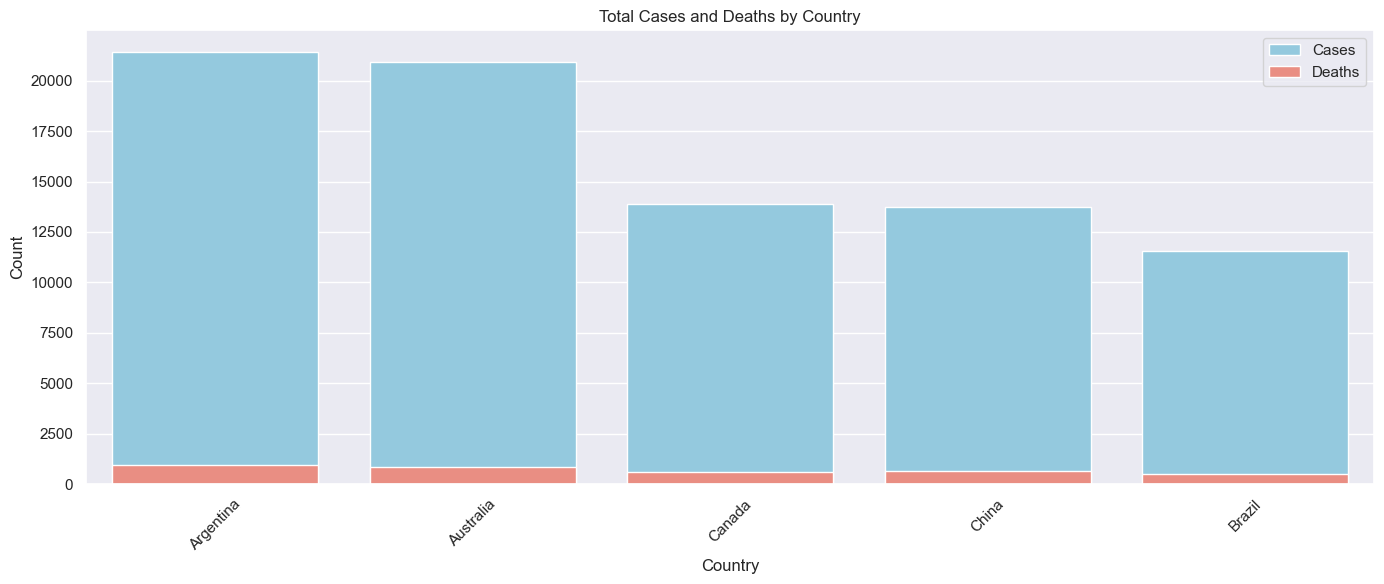

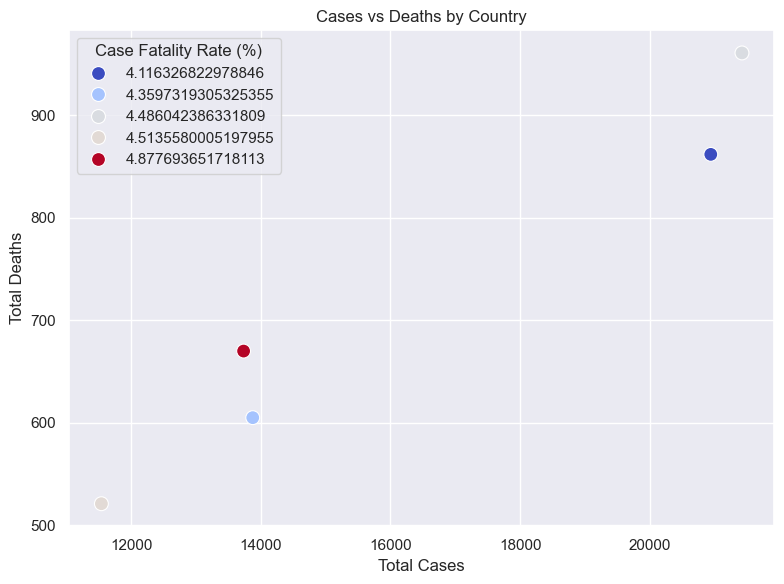

In [8]:
# Step 6: Country-wise Summary
country_summary = df.groupby('country')[['NEW Cases', 'NEW_DEATHS']].sum().reset_index()
country_summary['Case Fatality Rate (%)'] = (country_summary['NEW_DEATHS'] / country_summary['NEW Cases']) * 100

# Step 7: Bar Plot for Total Cases and Deaths per Country
plt.figure(figsize=(14, 6))
sns.barplot(data=country_summary.sort_values('NEW Cases', ascending=False), 
            x='country', y='NEW Cases', color='skyblue', label='Cases')
sns.barplot(data=country_summary.sort_values('NEW Cases', ascending=False), 
            x='country', y='NEW_DEATHS', color='salmon', label='Deaths')
plt.title('Total Cases and Deaths by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Step 8: Scatter Plot - Case vs Deaths
plt.figure(figsize=(8, 6))
sns.scatterplot(data=country_summary, 
                x='NEW Cases', y='NEW_DEATHS', 
                hue='Case Fatality Rate (%)', 
                palette='coolwarm', s=100)
plt.title('Cases vs Deaths by Country')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.show()
